Dhruvi Lodhavia - A59018925

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('../datasets/pre_processed_data.csv')


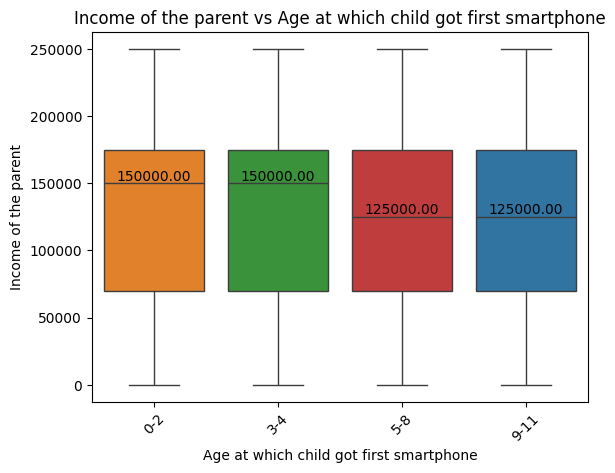

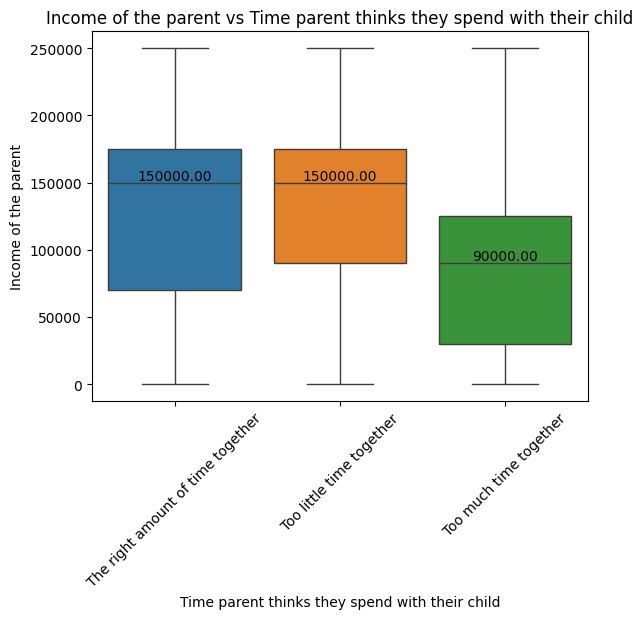

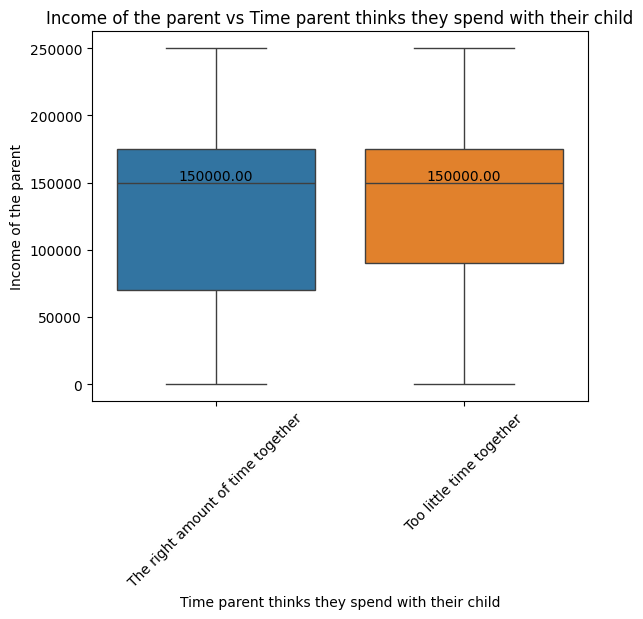

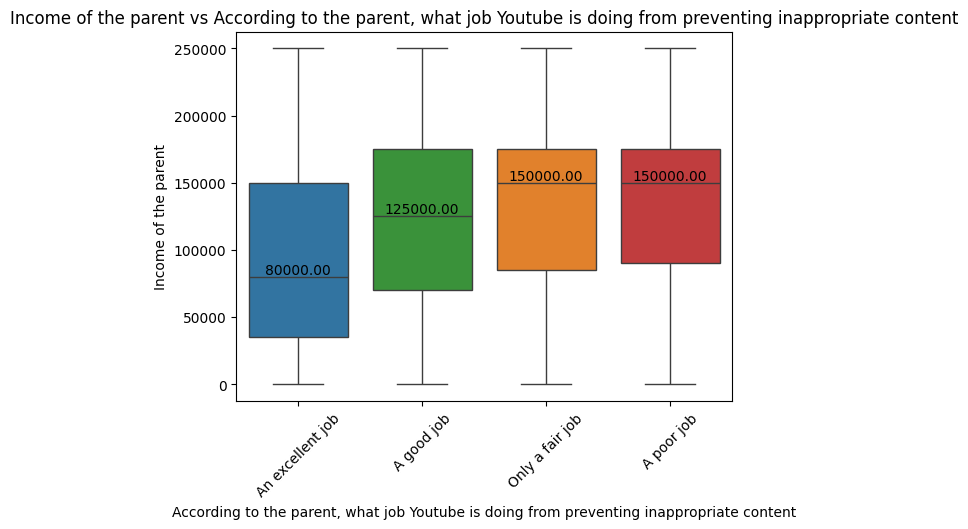

In [2]:
def plot_boxplot(data, column1, column2, column1_name, column2_name):
    '''
    Plots a boxplot for column1 and column2
    
    args- 
    data: Dataframe containing the whole data
    column1: Column name of the y-axis
    column2: Column name of the x-axis
    column1_name: Label for y-axis
    column2_name: Label for x-axis
    returns - 
    None
    Displays a boxplot
    '''
    filtered_df = data[(data[column1] != 'Refused') & (data[column2] != 'Refused')]
    filtered_df = filtered_df[~filtered_df[column2].isnull()]
    sorted_values = filtered_df[column2].sort_values().unique()

    if column2 == 'YT_preventing_inappropriate':
        sorted_values = [
            "An excellent job",
            "A good job",
            "Only a fair job",
            "A poor job"
        ]

    sns.boxplot(y=column1, x=column2, data=filtered_df, hue=column2, legend=False, order=sorted_values)
    for i, box in enumerate(sorted_values):
        vals = filtered_df[filtered_df[column2] == box][column1]
        median_val = vals.median()
        plt.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontdict={'fontsize': 10})
    plt.ylabel(column1_name)
    plt.xlabel(column2_name)
    plt.xticks(rotation=45)
    plt.title(f'{column1_name} vs {column2_name}')
    plt.savefig(f'{column1_name}_vs_{column2_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_boxplot(data, 'P_income', 'Child_first_age_smartphone','Income of the parent','Age at which child got first smartphone')
plot_boxplot(data, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
filtered_df = data[(data['P_income'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Too much time together')]
plot_boxplot(filtered_df, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
plot_boxplot(data, 'P_income', 'YT_preventing_inappropriate','Income of the parent','According to the parent, what job Youtube is doing from preventing inappropriate content')
    

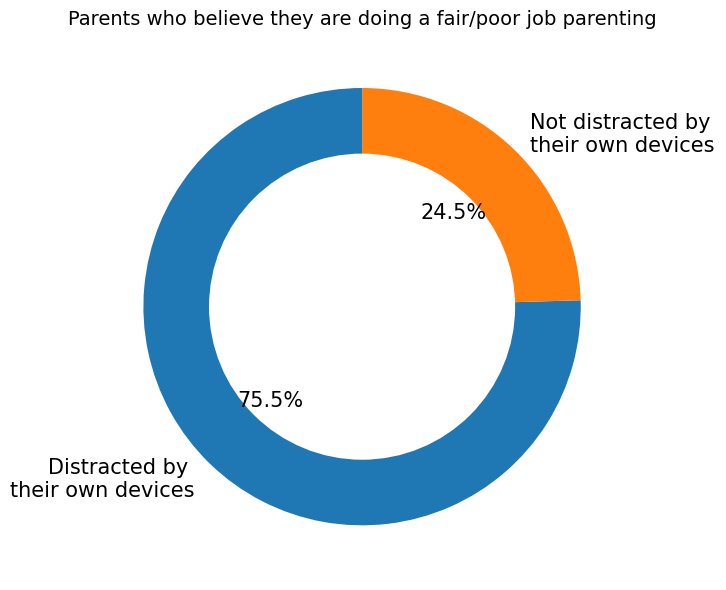

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_job_performance_and_distraction(data):
    """
    Plot the counts of parental job performance and distraction frequency.

    args -:
    data: DataFrame containing columns 'How_often_distracted' and 'Time_spent_together'

    Returns:
    (none)
    displays the plot
    """

    condition_total_fair_poor = data[data['Time_spent_together'].isin(['Only a fair job', 'A poor job'])]
    condition_distracted_fair_poor = condition_total_fair_poor[condition_total_fair_poor['How_often_distracted'].isin(['Often', 'Sometimes'])]

    count_total_fair_poor = condition_total_fair_poor.shape[0]
    count_distracted_fair_poor = condition_distracted_fair_poor.shape[0]

    # Data for pie chart
    sizes = [count_distracted_fair_poor, count_total_fair_poor - count_distracted_fair_poor]
    labels = ['Distracted by \ntheir own devices', 'Not distracted by \ntheir own devices']

    # Plotting pie chart as a donut chart
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90)

    # Draw a circle at the center of pie to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)

    # Increase the font size of the title and labels
    plt.title('Parents who believe they are doing a fair/poor job parenting', fontsize=14)

    for text in texts:
        text.set_fontsize(15)
    for autotext in autotexts:
        autotext.set_fontsize(15)

    plt.tight_layout()
    plt.show()


plot_job_performance_and_distraction(data)

In [4]:
def plot_parent_monitoring_percentage(df, columns, y_labels=None, titles=None,image_name='parent_monitoring.png'):
    '''
    plots parent monitoring percentage
    args - 
        df - dataframe
        columns - list of columns
        y_labels - list of y labels
        titles - list of titles
        image_name - name of the image to be saved
    returns - saves image
    
    '''
    
    assert isinstance(df, pd.DataFrame), 'Provide a pandas DataFrame instance'
    assert isinstance(columns, list), 'Provide a list of columns'
    assert isinstance(y_labels, list) or y_labels is None, 'Provide a list of y labels or None'
    assert isinstance(titles, list) or titles is None, 'Provide a list of titles or None'
    assert len(columns) == len(y_labels) or y_labels is None, 'Length of columns and y_labels should be same'
    assert len(columns) == len(titles) or titles is None, 'Length of columns and titles should be same'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 5))

    for i, column in enumerate(columns):
        # Counting the occurrences of 'Yes, I do this' for each race
        yes_counts = df[df[column] == 'Yes, I do this'].groupby('P_race').size()
        total_counts = df.groupby('P_race').size()
    
        # Calculating total percentages for 'Yes, I do this'
        yes_percentages = (yes_counts / total_counts) * 100

        # Sorting
        yes_percentages_sorted = yes_percentages.sort_values()

        # Excluding 'Refused' category
        yes_percentages_sorted = yes_percentages_sorted[yes_percentages_sorted.index != 'Refused']

        # Plotting the bar graph 
        bars = yes_percentages_sorted.plot(kind='bar', ax=axes[i])
        bars.set_ylabel(y_labels[i] if y_labels else 'Percentage of parents who monitor their children')
        bars.set_xlabel('Parent Race')
        bars.set_title(titles[i] if titles else f'Percentage of {column} by Parent Race')
        bars.set_xticklabels(yes_percentages_sorted.index, rotation=0)

        # Adding percentage annotations
        for j, percentage in enumerate(yes_percentages_sorted):
            axes[i].text(j, percentage , f'{percentage:.2f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(image_name)
    

In [5]:
def plot_social_media_by_age(data,image_name='social_media_by_age.png'):
    '''
    plots social media usage by age in a single plot
    args - 
        data - dataframe
        image_name - name of the image to be saved
    returns- 
        plots the chart
    
    '''
    assert isinstance(data,pd.DataFrame),'Provide a dataframe instance'
    assert isinstance(image_name, str), 'Provide a string for image_name'
    map_age_to_age_groups = {'0': '0-2', '1': '0-2', '2': '0-2', '3': '3-5', '4': '3-5', '5': '3-5',
                             '6': '6-8', '7': '6-8', '8': '6-8', '9': '9-11', '10': '9-11', '11': '9-11'}
    data['Child_age_groups'] = data['Child_age_0_11'].map(map_age_to_age_groups)
    social_media_columns = ['CHSO_facebook', 'CHSO_instagram', 'CHSO_snapchat', 'CHSO_tiktok', 'CHSO_other_websites', 'Uses_youtube','Child_age_groups']
    social_media_data = data[social_media_columns].copy()  # Create a copy of the DataFrame
    
    # Convert categorical columns to numerical values for analysis
    social_media_data.replace({'No, my child does not use this': 0, 'Yes, my child uses this': 1, 'Refused': None, 'Missing': None}, inplace=True)
    
    social_media_data.replace({'No, my child does not watch videos on YouTube': 0, 'Yes, my child watches videos on YouTube': 1, 'Refused': None, 'Missing': None}, inplace=True)

    # Get percentages for each social media platform
    platforms = ['CHSO_facebook', 'CHSO_instagram', 'CHSO_snapchat', 'CHSO_tiktok', 'CHSO_other_websites','Uses_youtube']
    platforms_short_form = ['Facebook', 'Instagram', 'Snapchat', 'TikTok', 'Other Websites','Youtube']
    plt.figure(figsize=(15, 10))

    for i, platform in enumerate(platforms, 1):
    
        total_users = social_media_data['Child_age_groups'].value_counts()

        platform_users = social_media_data[social_media_data[platform] == 1]
        platform_users_count = platform_users['Child_age_groups'].value_counts()
    
        total_platform_users = platform_users_count.sum()
        percentages = (platform_users_count / total_users) * 100
        # print("percentages",percentages)
        plt.subplot(2, 3, i)
        ax = sns.barplot(x=percentages.index, y=percentages.values)
        
        ax.set_title(f'Percentage of Children Using {platforms_short_form[i-1]} by Age')
        ax.set_xlabel('Child Age (0-11)')
        ax.set_ylabel(f'% of children using {platforms_short_form[i-1]}')
        ax.set_ylim(0, 100)

        for index, value in enumerate(percentages):
            plt.text(index, value + 2, f'{value:.2f}%', ha='center')

    plt.tight_layout()
    plt.suptitle('Social Media Usage by Age Groups', fontsize=16) 
    plt.subplots_adjust(top=0.9) 
    plt.savefig(image_name)

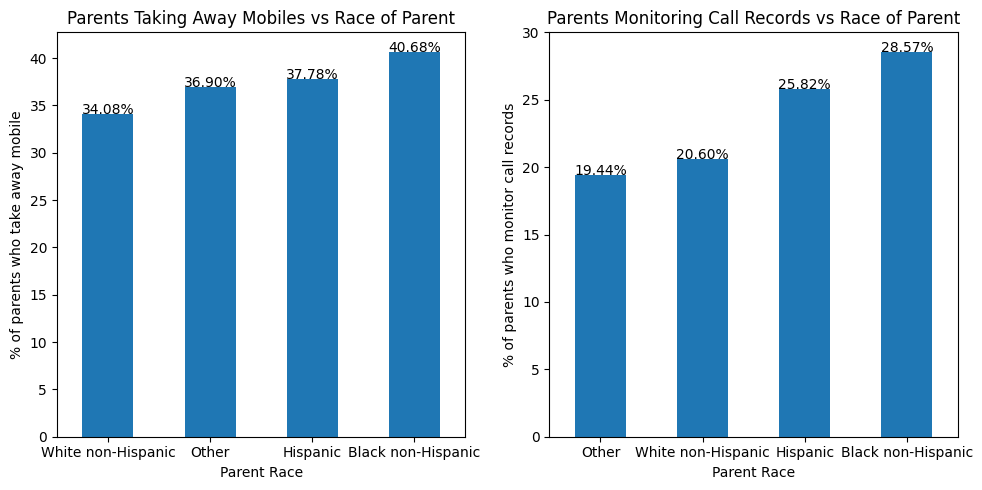

In [6]:
df = pd.DataFrame(data)

columns_to_analyze = [ 'MNT_take_away_mobile', 'MNT_call_records']
custom_y_labels = ['% of parents who take away mobile', '% of parents who monitor call records']
custom_titles = ['Parents Taking Away Mobiles vs Race of Parent', 'Parents Monitoring Call Records vs Race of Parent']

plot_parent_monitoring_percentage(df, columns_to_analyze, custom_y_labels, custom_titles,'visualization4_monitoring.png')


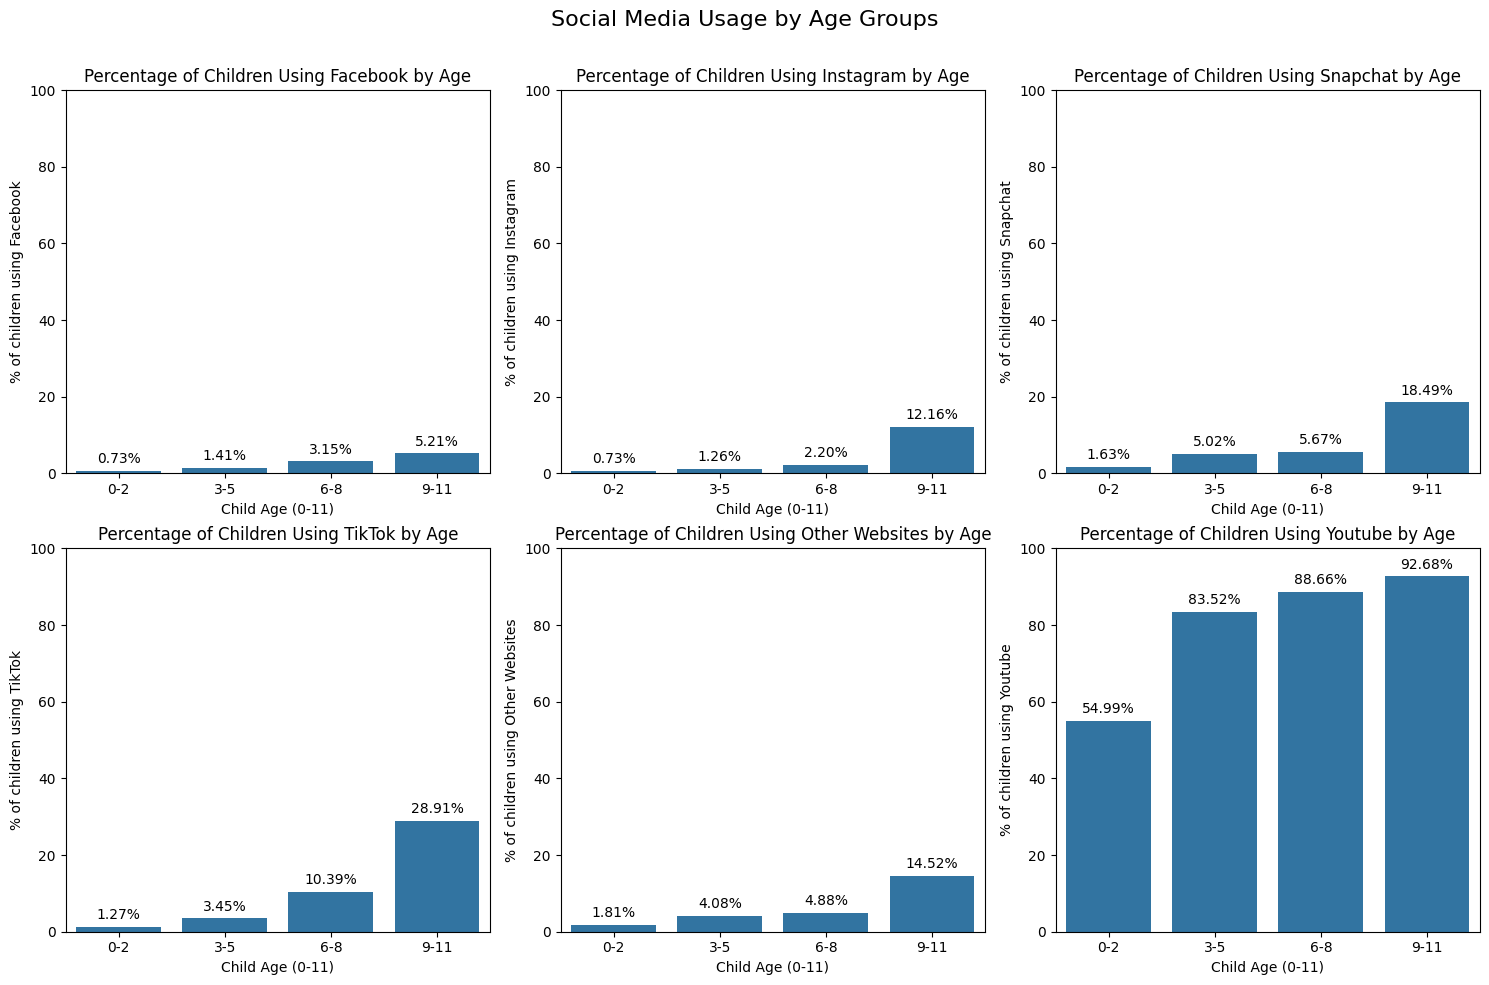

In [7]:
plot_social_media_by_age(data,'visualization6_social_media.png')
